In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans


In [3]:
data= pd.read_csv("./data/Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
data.shape

(200, 5)

In [16]:
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

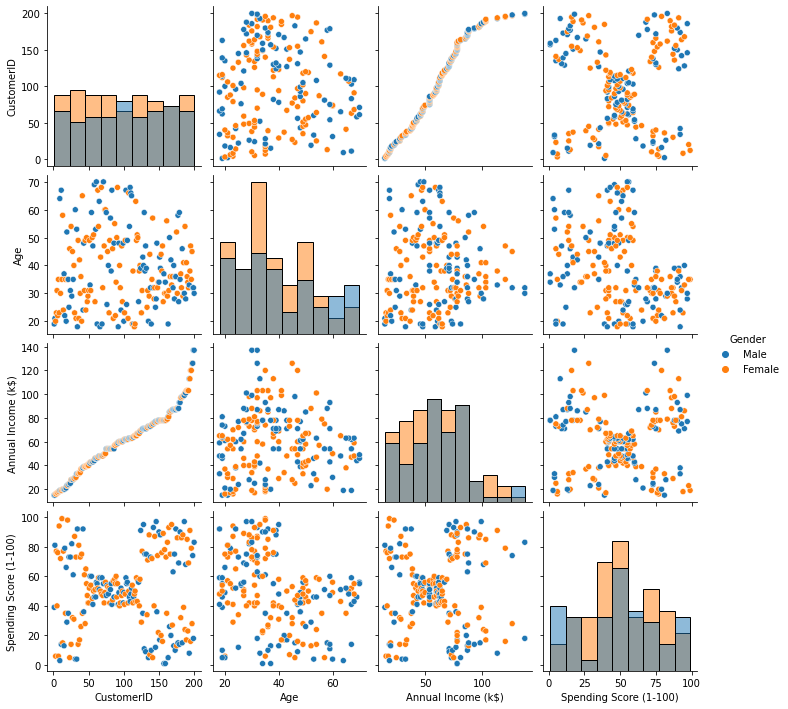

In [37]:
sns.pairplot(data,hue="Gender", diag_kind="hist")

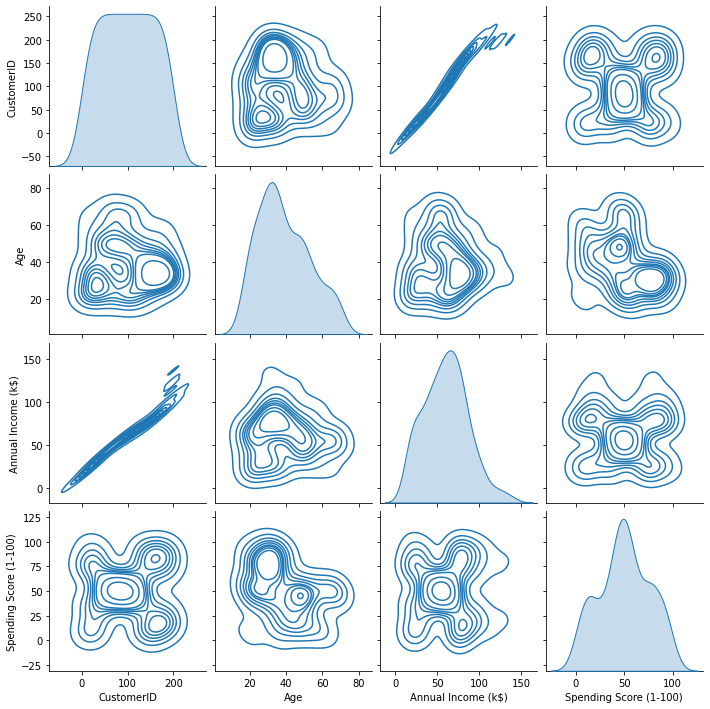

In [39]:
sns.pairplot(data, kind="kde")

<AxesSubplot:>

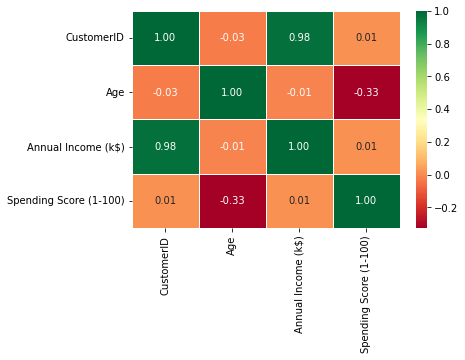

In [40]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", fmt=".2f", linewidths=.5)

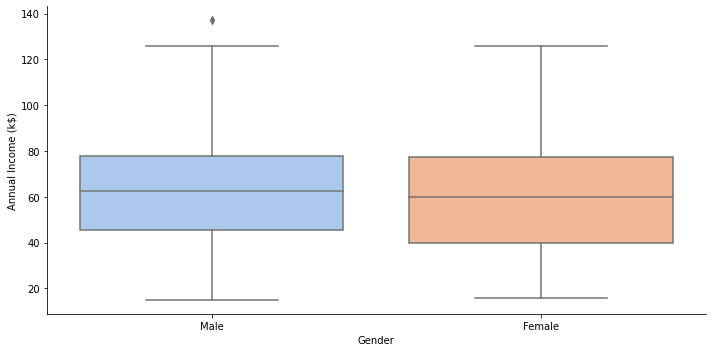

In [45]:
sns.catplot(data=data, x ="Gender", y="Annual Income (k$)", kind="box", aspect=2, palette="pastel")

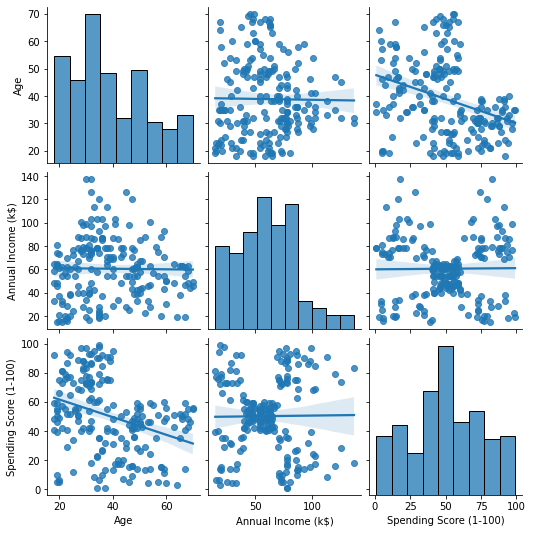

In [29]:
sns.pairplot(data,vars=["Age","Annual Income (k$)","Spending Score (1-100)"],kind="reg")

<AxesSubplot:>

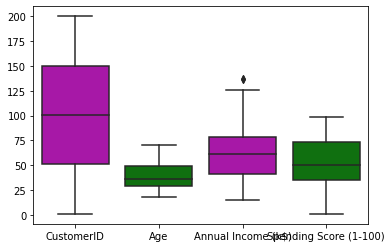

In [56]:
sns.boxplot(data=data, palette=["m", "g"])

In [57]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [59]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
# choose the clusters needed

# X = data.iloc[:,[3,4]].values
# print(X)

In [67]:
# within clusters sum of square
# wcss = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

In [68]:
# sns.set()
# plt.plot(range(1,11),wcss)
# plt.title("The Elbow Method")
# plt.xlabel("Number of clusters")
# plt.ylabel("WCSS")
# plt.show()

choose the elbow point whereby there are no other elbows available in the given graphs: IN this case I am using 5 because therir no other elbow points in the graphs

In [69]:
# kmenas = KMeans(n_clusters=5, init='k-means++', random_state=10)

In [70]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [79]:
# convert the Gender into numeric
data["Gender"].replace("Female",0,inplace=True)
data["Gender"].replace("Male", 1, inplace=True)

In [80]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [82]:
X = data.iloc[:,[1,3,4]].values
# print(X)

In [85]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [86]:
wcss

[270030.55999999994,
 181412.61414141415,
 106397.213850762,
 73728.62329226075,
 44497.18546815503,
 37282.493602549366,
 30307.795574715143,
 25059.34263322884,
 21897.612392646115,
 19719.0722169546]